# Instructions

Answer the questions and perform any additional analysis you think will help you understand what's going on in the data. You will be required to present your work, you can use this notebook or create slides based on your analysis. Whatever you’re comfortable with is fine with us.

The section headings below are only a guide and this notebook should be modified as you see fit.

# 1. Data processing

- Importing all libraries which will be used in this data set

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as stats
from matplotlib import rcParams 

In [ ]:
data_file = pd.read_csv('../dataset/data.csv')
data_file.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [ ]:
data_file.isnull().tail()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
189,False,False,False,False,False,False,False,False,False,True,False,False,False
190,False,False,False,False,False,False,False,False,False,False,False,True,True
191,False,False,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,True,True,True


In [ ]:
data_file.isnull().sum()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

1. By calling the method data_file.isnull() it produces boolean values True and false in each of my columns,where The boolean is False it tell us there is value where as where the boolean is True it tell us that there is a missing value.
- We would like to know How many values are missing in each and every column and therefore will make use of data_file.isnull().sum to sum up every missing value in each and every column.
- We can then deduce that in Fertility rate there is 11 missing columns
- In Cellular subscrisbers there is 10 missing values
- Literacy rate there is 91 missing values
- GNI 32 
- PrimarySchoolEnrollmentMale 93
- PrimarySchoolEnrollmentFemale 93


In [ ]:

data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

2. Firstly we going to call the method info which list all of our columns and the total number of our entries and the Data type in our data set,which we can see there is a 194 entries and 13 rows.
- To solve for our missing values we will just leave them as they are we won't perform any action, We will allow the algorithm to react to the data on its own way.

# 2. Exploratory data analysis

In [ ]:
data_file[data_file['Under15'] ==data_file['Under15'].max()]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
123,Niger,Africa,17157,49.99,4.26,7.58,56,113.5,29.52,NaN,720.0,64.2,52.0


In [ ]:
data_file[data_file['Under15'] ==data_file['Under15'].min()]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,NaN,35330.0,NaN,NaN


3. I start by using my boolean logic to select the columns of the Under15 age in my data making use of the min and max method     to look for maximum and minimum values in the column 'Under15'
  - Therefore Country with the Highest population under15 in (percentage) --Is Niger in our data set
  - Country with the Lowest population under15 in (percentage)-- Is Japan
 

In [ ]:

data_file[data_file['Over60'] == data_file['Over60'].max()]


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,NaN,35330.0,NaN,NaN


In [ ]:
data_file[data_file['Over60']==31.92]

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,NaN,35330.0,NaN,NaN


4. Again I will use the the boolean logic to select the columns of the Over60 in my data making use of the max() method to finding   the highest region population.
- By calling this method we can determine that the region with the Highest population over 60 is the Western Pacific

Text(0.5, 1.0, 'Scatter plot to demostrate Fertility rate and Gross National Income (GNI)')

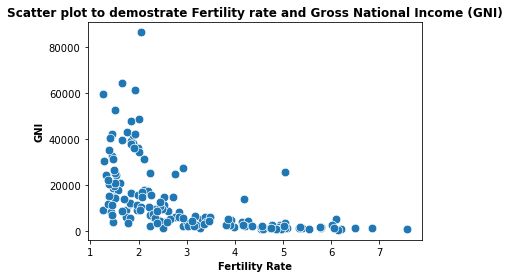

In [ ]:
sns.scatterplot(data=data_file,x="FertilityRate",y="GNI",s=75)
rcParams['figure.figsize'] =10,6
plt.xlabel('Fertility Rate',fontweight='bold')
plt.ylabel("GNI",fontweight='bold')

plt.title('Scatter plot to demostrate Fertility rate and Gross National Income (GNI)',fontweight='bold')


5. First we will make use of scatter plot function importing it from the seaborn library, We will then pass in our arguments x-axis as Fertility Rate and y-axis as GNI, is Important to give our scatter plot a title we will then do this by calling the method plt.title() after that we will use our plt.show() to be able to view all the changes we made on the graph.

- To find out whether fertility decrease as income increases ,I will compare the column of FertilityRate and the GNI.Fertility column is going to be our independent variable where as Gross National Income(GNI) is going to be our dependent variable. We can then deduce that As Fertility Rate decreases the Income increases the relationship still hold vice versa
   
- Athough we can tell from our scatter plot that in some countries there is a High fertility rate and at the same time a slightly High Gross National Income(GNI), this countries in our evaluated relationship we will then call them outliers since they are not following the relationship which the scatter plot trend.

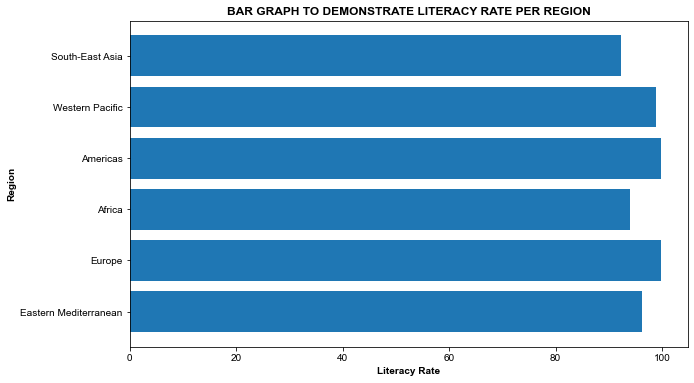

In [ ]:

plt.barh(data_file['Region'], data_file.LiteracyRate)
plt.xlabel('Literacy Rate',fontweight='bold')
plt.ylabel('Region',fontweight='bold')
plt.style.use('seaborn')
plt.title('BAR GRAPH TO DEMONSTRATE LITERACY RATE PER REGION',fontweight ='bold')

plt.show()



6. First we will make use of barh plot function importing it from the pyplot library, We will then pass in our arguments x-axis as Literacy Rate and y-axis as Region, is Important to give our bar plot a title we will then do this by calling the method plt.title() after that we will use our plt.legend() and plt.show() to be able to view all the changes we made on the graph.
-  South-East Asia and Africa Are the regions which have the lowest literacy rates.
- In this case it can be seen that South-East Asia and Africa has the lowest readings on our graph.


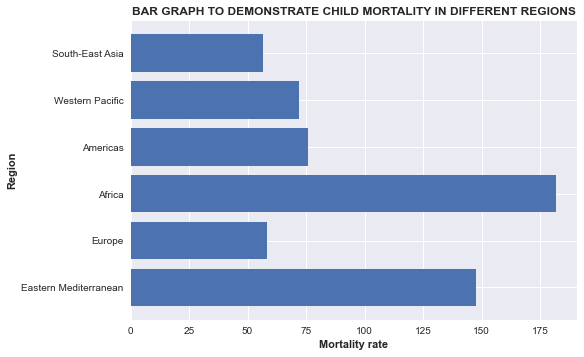

In [ ]:

plt.barh(data_file['Region'], data_file.ChildMortality)
plt.xlabel('Mortality rate',fontweight ='bold')
plt.ylabel('Region',fontweight='bold')
plt.style.use('seaborn')
plt.title('BAR GRAPH TO DEMONSTRATE CHILD MORTALITY IN DIFFERENT REGIONS',fontweight ='bold')
plt.show()



7.  First we will make use of barh plot function importing it from the pyplot library, We will then pass in our arguments x-axis as Region and y-axis as Child Mortality Rate, is Important to give our bar plot a title we will then do this by calling the method plt.title() after that we will use our plt.legend() and plt.show() to be able to view all the changes we made on the graph
- Above is a bar  graph showing child mortality rates and we can deduce that South East Asia and Europe have the Lowest child mortality rates.


Text(0, 0.5, 'Life Expectancy')

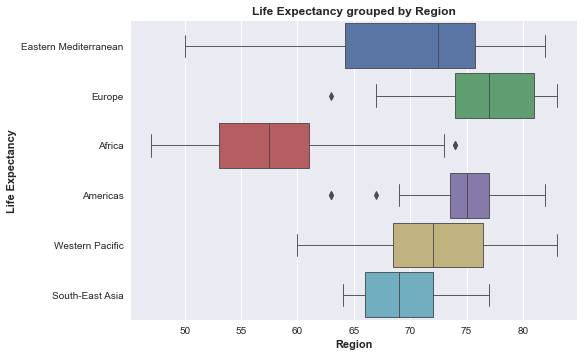

In [ ]:
sns.boxplot(x=data_file.LifeExpectancy,y=data_file['Region'],width=0.9,linewidth=0.9)
plt.title('Life Expectancy grouped by Region',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('Life Expectancy',fontweight='bold')

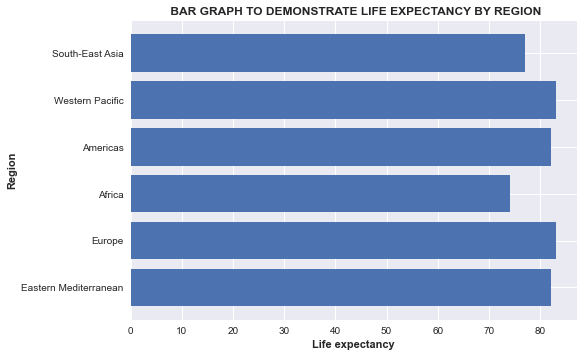

In [ ]:
plt.barh(data_file['Region'], data_file.LifeExpectancy)
plt.xlabel('Life expectancy',fontweight ='bold')
plt.ylabel('Region',fontweight='bold')
plt.title(" BAR GRAPH TO DEMONSTRATE LIFE EXPECTANCY BY REGION",fontweight ='bold')
plt.show()





8. Above is the box and whisker plot And a bar graph to investigate life expectancy.
- To use this box and whisker we have to use th sea born library and the method boxplot ,we will be investigating life expectancy per region, we can tell that from the box plot and bar graph
- People in Africa have the least life expectancy.
- People from Europe have the most life expecctancy.
- Since most of the African Countries have low Gross income which creates lack in certain needs which decrease life expectancy and most European regions have Higher Income which then lead to an Increase in life expectancy


Text(0.5, 1.0, 'Correlation Map representation')

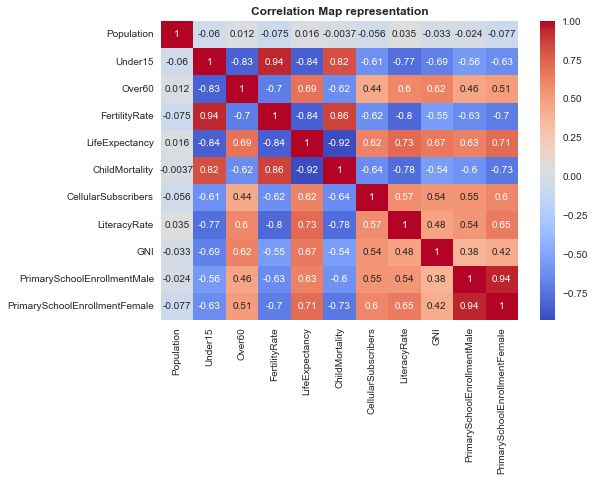

In [ ]:
sns.heatmap(data_file.corr(),annot=True ,cmap='coolwarm')
plt.title('Correlation Map representation',fontweight='bold')


- Above is my heat map to measure out my correlations of different variables.
- To access the heat map will use the seaborn module 
- This heat map shows annotation on the right hand side for the correlations.

9. We have to first check the correlation of every variable against the other using the .corr() method and our heat map.
- Here we can clearly deduce down the below that There is a moderate strong correlation between life expectancy and wealth, meaning people who have more wealth can access more needs than people without.
- Again we can deduce that there is a negative moderate correlation between wealth and fertility, because in order for reproduction to occur one does not need to have money which this correlation holds true.
- Some of the African countries these relationships won't hold because their fertility rate is very high then most of the mortality will occur in result
- From our Correlation results we can absolutely deduce that there is a higher postive correlation between LifeExpectancy and ChildMortality. Hence this relationship won't hold in african countries 

Text(0, 0.5, 'Life Expectancy')

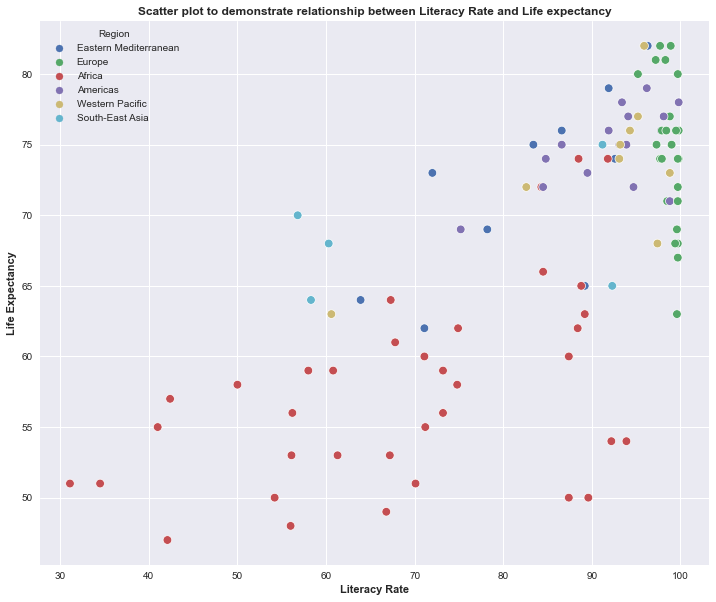

In [ ]:
rcParams['figure.figsize'] =12,10
sns.scatterplot(data=data_file,x="LiteracyRate",y="LifeExpectancy",hue='Region',s=75)
plt.title('Scatter plot to demonstrate relationship between Literacy Rate and Life expectancy',fontweight='bold')
plt.xlabel('Literacy Rate',fontweight='bold')
plt.ylabel('Life Expectancy',fontweight='bold')


10. First we will make use of scatter plot function importing it from the seaborn library, We will then pass in our arguments x-axis as Literacy Rate and y-axis as Life Expectancy, is Important to give our scatter plot a title we will then do this by calling the method plt.title() after that we will use our plt.show() to be able to view all the changes we made on the graph.

  - The relationship between Literacy Rate and Life Expectancy there is a positive correlation.
  - We conclude that as Literacy rate increases the Life expectancy increases also increase.
  - This hold true because the more people get educated the more they take smart decisions to improve their lives.
- Africa does not show the direct proportional relationship between Literacy rate and Life expectancy.There is no correlation in African countries to literacy rate and Life expectancy.The data is very dispersed
  

# 3. Conclusion and insights 

###### ANALYSIS BASED ON QUESTION BY QUESTION FINAL CONCLUSIONS

1. Yes they are missing values in the data sets missing values should be replaced by NaN to indicate that the values are missing, and inspect the importance and effect it has on our data

2. Missing values in the data set should be dropped in the data set to increase the data realibility, we can also account for the percentage of missing values  

3. Japan=Lowest Under15 and Niger=Highest Under15

4. Europe Has the Highest population over60

5. Fertility decrease when income increases in developed countries according to our data
   Some countries don't seem to follow the relation mainly because they are still developing countries, and there's higher fertility rate, and some countries seem to have slightly increase in fertility rate and at the same time highest GNI

6. From our bar graph above we can deduce that South-East Asia and Africa are 2 regions with the lowest Literacy rate

7. South-East Asia,Americas,Western Pacific are regions with lowest child mortality rates.

8. - we can conclude that Africa has the lowest life expectancy
   -Since in african regions theres less of income it means access to health care is no easily accessible ,hence the life expectancy is short

9. -There is a moderate strong correlation between life expectancy and wealth across different regions
  - There is a negative moderate coorrelation between wealth and fertility across different regions.
  - yes this Relations seems to hold in african countries because less money in the economy leads to poor health since access of 
    medical facilities it will be lacking

 10. - In African countries we can deduce that Life expentancy is shorter compared to other countries so this relationship               hold.
    - Because there is a lack in literacy